<a href="https://colab.research.google.com/github/apollo13092808/pytorch-docs/blob/main/Datasets_and_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

In [2]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   transform=ToTensor(),
                                   download=True)

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  transform=ToTensor(),
                                  download=True)

In [3]:
labels_map = {0: "T-Shirt",
              1: "Trouser",
              2: "Pullover",
              3: "Dress",
              4: "Coat",
              5: "Sandal",
              6: "Shirt",
              7: "Sneaker",
              8: "Bag",
              9: "Ankle Boot"}

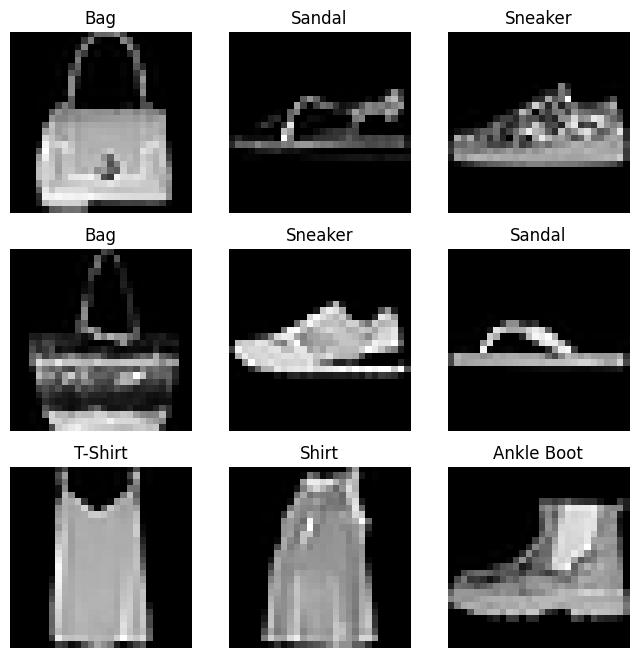

In [4]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 3, 3


for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


plt.show()

In [5]:
class CustomImageDatset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [6]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=64,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=64,
                             shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
 Labels batch shape: torch.Size([64])



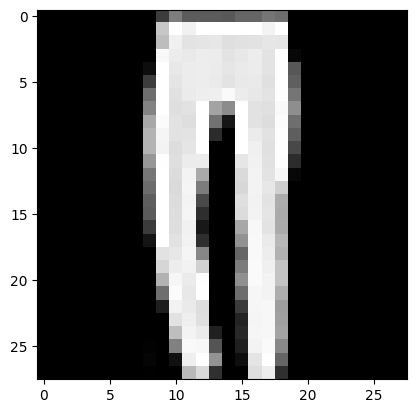


Label: 1


In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f" Labels batch shape: {train_labels.size()}")
print()

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()

print(f"\nLabel: {label}")